# Scientific Python Bootcamp Day 3

Prepared and presented by John Russell (johnrussell@g.harvard.edu) and Ian Hunt-Isaak (ianhuntisaak@g.harvard.edu)

### Getting Started
http://tinyurl.com/9ddaf9gy

### Topics for Today

- Review of jupyter lab
- Random numbers and random walks 
- Introduction to the scientific python ecosystem
- Local installation of jupyter lab

### Jupyter Lab Review

**The Essentials**
- `Shift + Enter` executes a cell
- `Shift + Tab` shows the documentation of a function
- `Tab` will attempt to auto-complete the word you are typing

**Cell Operations**
- There are two modes in a jupyter notebook: *Edititing* mode is where you are editing text in a cell. *Command* mode is when you are outside of a cell. `Esc` while in a cell switches to command mode. `Enter` will select a cell and enter editing mode there if you are in command mode.
- `Esc + a` makes a new cell *above* your current position 
- `Esc + b` makes a new cell *below* your current position
- `Esc + m` converts a cell into a markdown cell
- `Esc + y` converts a cell into a code cell.
- `Esc + d + d` deletes a cell
- `Esc + i + i` interrupts the execution of a cell
- If you really get into it, you can make custom keyboard shortcuts in `Settings > Advanced Settings > Keyboard Shortcuts`

There are also jupyter lab extensions that can really improve the experience of using jupyter lab. A very good list of these extensions is called [Awesome Jupyter](https://github.com/markusschanta/awesome-jupyter).

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#this cell changes some matplotlib defaults to make plots nicer 
import matplotlib as mpl
mpl.rc("font", family='serif')
mpl.rc("figure", figsize=(9,6))
%config InlineBackend.figure_format = 'retina'

## Random numbers and random walks

Random number generation is a surprisingly tricky thing to do on a computer which we generally think of as highly non-random. Strictly speaking, we will be talking about *pseudo*random number generation since its impossible to genereate truly random numbers. However it is important enough that lots work has gone into doing it well and many of the best implementations live in the `numpy.random` module.

*Note*: The `numpy.random` module was changed significantly in summer of 2019 so what you'll see today is the modern usage. For compatibility reasons, numpy still supports the old way and you may well come across older code which will look slightly different.

The core of the random module is a `Generator` object. The easiest and most likely best way to initialize one is

In [3]:
rng = np.random.default_rng() #rng stands for Random Number Generator

The `Generator` object can then generate numbers from a vast array of different distributions. You can learn about these in a statistics class but I'll show a few examples.

In [4]:
#sample normal distribution
# loc = mean; scale = std. dev
normal_samples = rng.normal(loc=10, scale=20, size=1000)

In [6]:
#show every distribution, sample gamma
# press tab after `rng.` to see all the distributions available
gamma_samples = rng.gamma(2, 2, size=200)

In [8]:
#Randomly choose from pets
pets = ['cat', 'dog', 'fish', 'rabbit']

In [9]:
rng.choice(pets, size=5)

array(['cat', 'rabbit', 'dog', 'rabbit', 'rabbit'], dtype='<U6')

#### Random Walks

Random walks are a *very* powerful and widely used model in basically every area of science. One of the great things about random walks is that they are very easy to simulate and often analytically tractable though the math is much beyond the scope of this bootcamp. What is a random walk?

Here is the idea: a walker starts at some point and at each time point takes a "random step." There are many ways to define a random step but lets focus on the simplest case in 1 dimension. 
- A walker starts at 0 on the number line.
- The walker flips a coin.
- If the coin comes heads, take a step to the right (+1)
- If the coin comes up tails take a step to the left (-1)
- Repeat this process for many time steps i.e. coin flips.

In [10]:
steps = rng.choice([-1,1], size=1000)

In [11]:
position = np.cumsum(steps)

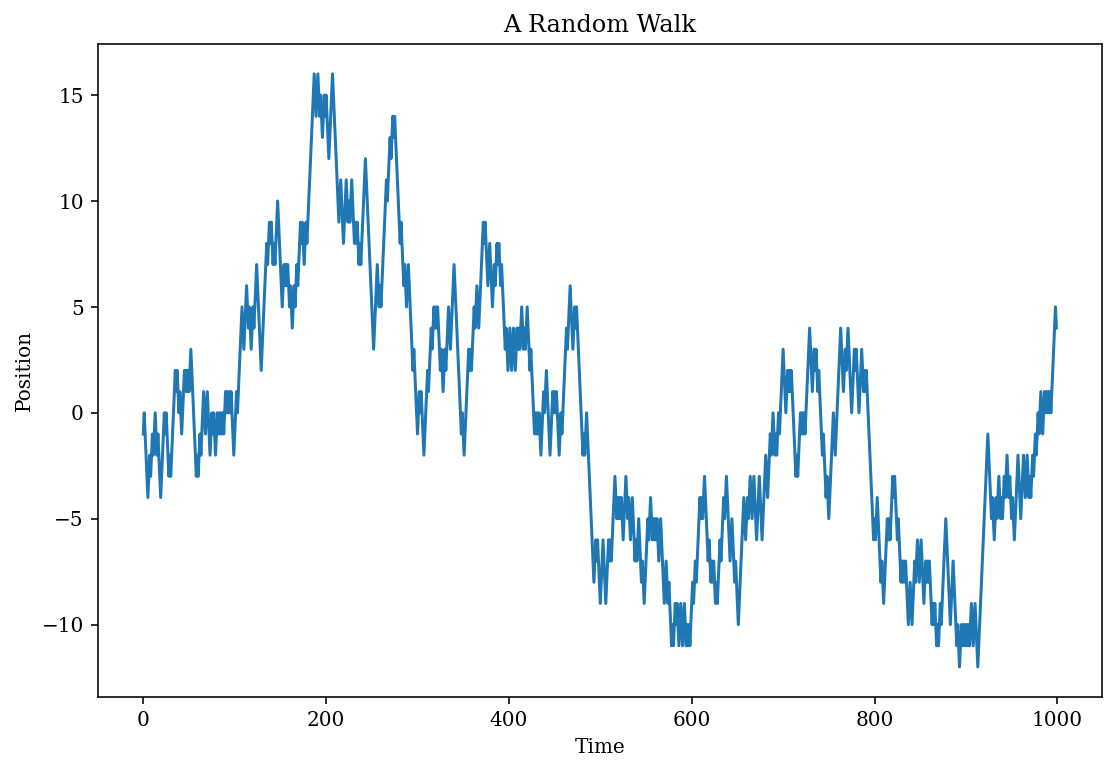

In [12]:
plt.plot(position)
plt.title("A Random Walk")
plt.xlabel('Time')
plt.ylabel('Position')
plt.show()

#### Compiling statistics

Often the idea with simulating random walkers is that we simulate many of them and the calculate statistics as a function of time. Said slightly differently, we often average over the walkers rather than averaging over time. 

In [13]:
# generate 1000 time steps for 500 walkers
steps = rng.choice([-1,1], size=(1000, 500))

In [15]:
#convert steps to positions
positions = steps.cumsum(axis=0)

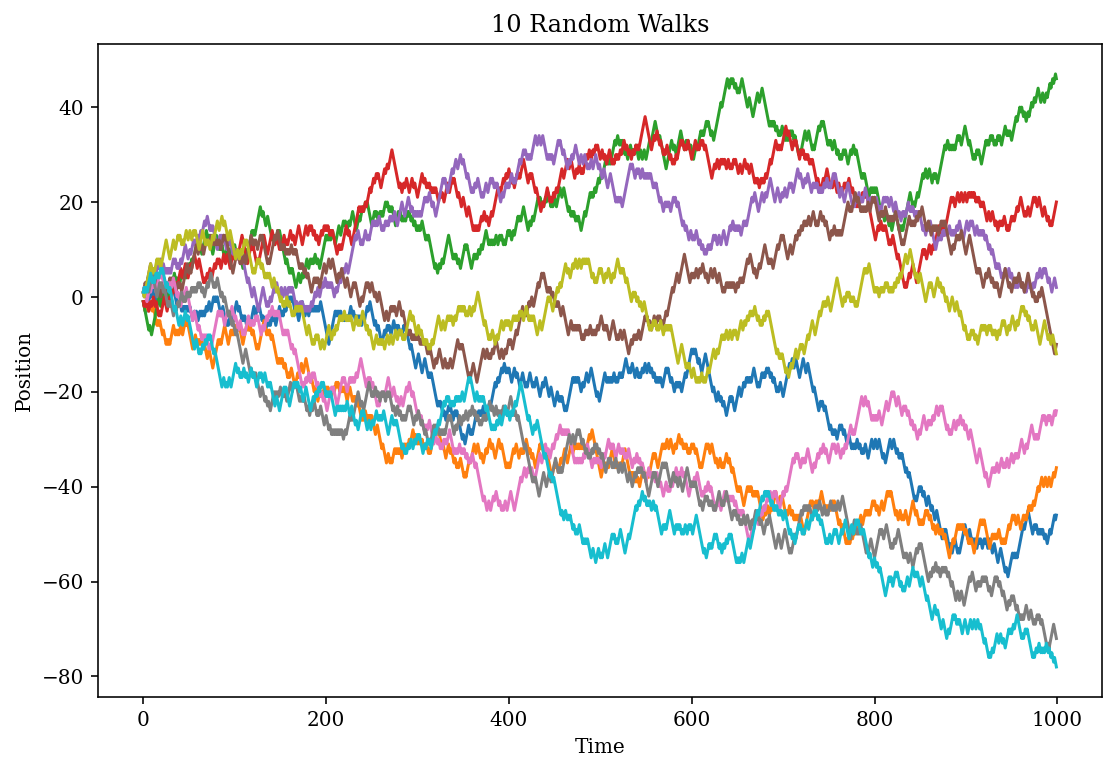

In [17]:
for i in range(10):
    plt.plot(positions[:,i])
plt.title("10 Random Walks")
plt.xlabel('Time')
plt.ylabel('Position')
plt.show()

Remember that we have 500 walkers and 1000 time steps so the first dimension in this array is time and the second dimension is the walkers.

In [18]:
positions.shape

(1000, 500)

In [19]:
mean = positions.mean(1)
std = positions.std(1)

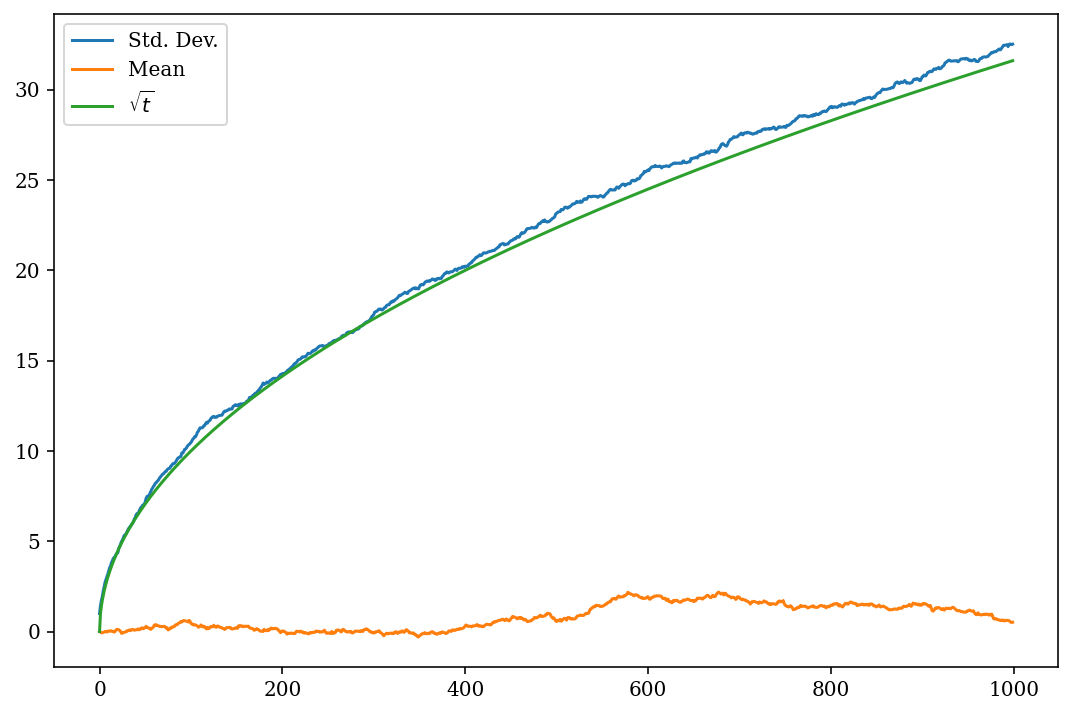

In [23]:
plt.plot(std, label="Std. Dev.")
plt.plot(mean, label='Mean')
# fit standard deviation
plt.plot(np.sqrt(np.arange(1000)), label='$\sqrt{t}$')
plt.legend()
plt.show()

#### Other questions we can ask

With this set of random walker trajectories we can ask other questions beyond just calculating simple statistics. For instance, roughly what fraction of walkers only walk in the positive part of the number line?

*Note* With only 500 walkers we dont really have enough to estimate complex quantites like this. Generally you might simulate as many as $10^9$ walkers but things do start to get slower at that point. 

In [24]:
#identify positive only trajectories
always_pos = np.all(positions>0, axis=0)

In [25]:
#count them
always_pos.sum()

5

In [26]:
#select the trajectories
pos_walkers = positions[:,always_pos]

In [27]:
pos_walkers.shape

(1000, 5)

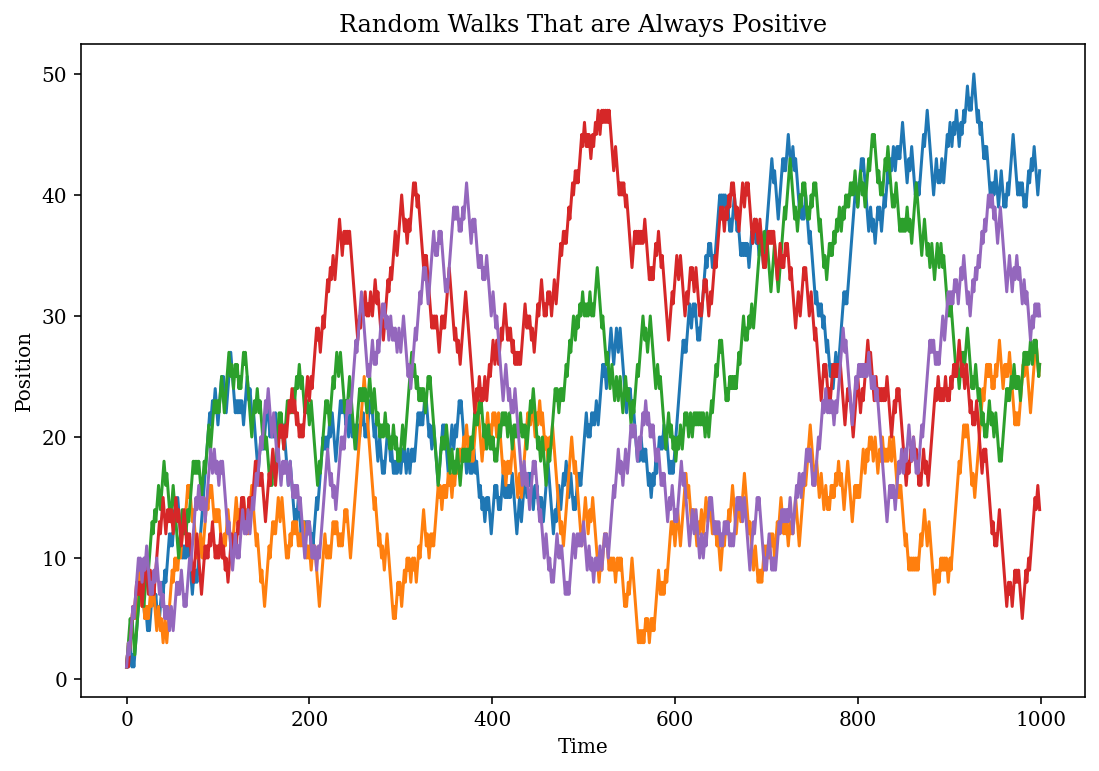

In [28]:
#plot 
for i in range(pos_walkers.shape[1]):
    plt.plot(pos_walkers[:,i])
plt.title("Random Walks That are Always Positive")
plt.xlabel('Time')
plt.ylabel('Position')
plt.show()

### Exercise 2

*Note* Since we are generating random numbers your individual results may be different. 


#### Part a.

Similate 100 random walkers each taking 1000 steps as above but rather than a "coin flip" to determine the step, have these walkers take a step to the right (+1) with probability 0.65 and a step to the left (-1) with probability 0.35 - this is often called a biased random walk. Make plot showing the trajectories of the walkers which ended up farthest from the origin and closest to the origin.

*Hint* Read the documentation of `rng.choice`

In [29]:
biased_rw = rng.choice([-1,1], p=[0.35, 0.65], size=(1000,100)).cumsum(0)

In [30]:
farthest_biased = biased_rw[:, biased_rw[-1].argmax()]
closest_biased = biased_rw[:, biased_rw[-1].argmin()]

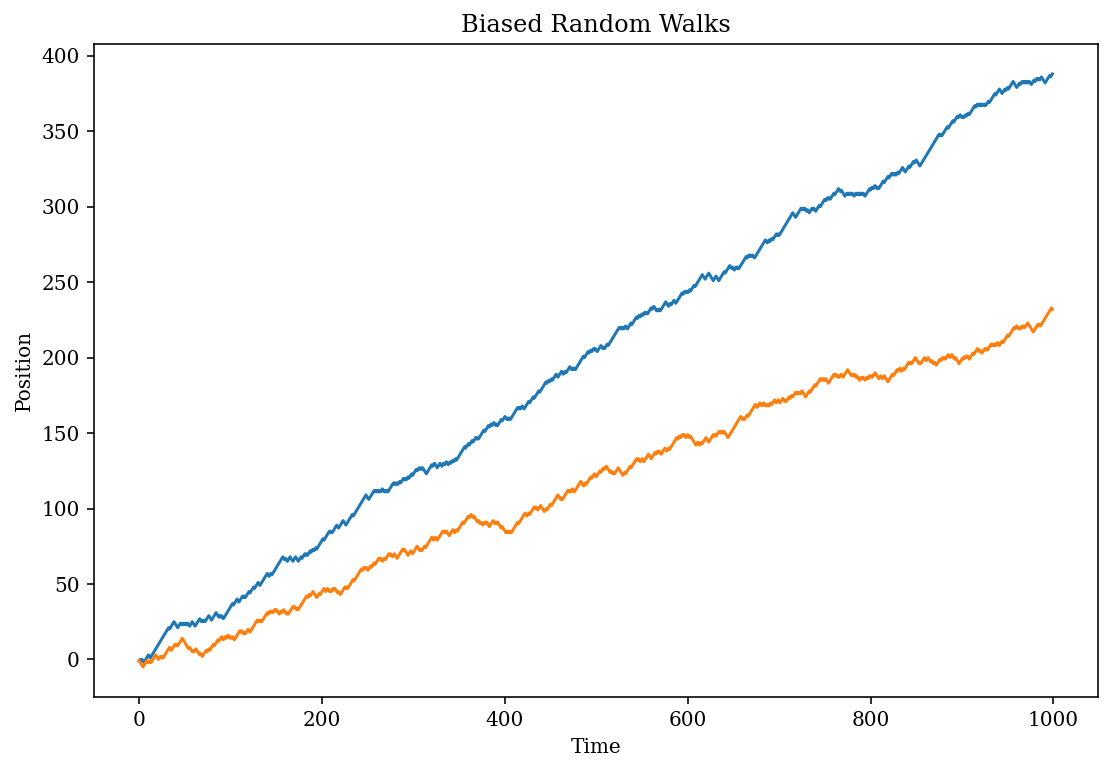

In [31]:
plt.plot(farthest_biased, label='Farthest')
plt.plot(closest_biased, label='Closest')
plt.title("Biased Random Walks")
plt.xlabel('Time')
plt.ylabel('Position')
plt.show()

#### Part b.

- Compute the mean and standard deviation of these walkers as a function of time. 
- Plot the mean and standard deviation as a function of time on the same axes. 
- Plot $\sqrt{t}$ as above and plot on the same axes. Does it still seem to describe the standard deiviation as a function of time?
- **Optional** Can you come up with a function that describes the mean as a function of time? Plot this function as well. *Hint* How do you think the average depends on the probability of going right? Does your formula give the correct result from the demo above when $p=0.5$?

In [32]:
biased_mean = biased_rw.mean(1)
biased_std = biased_rw.std(1)
t = np.arange(1000)

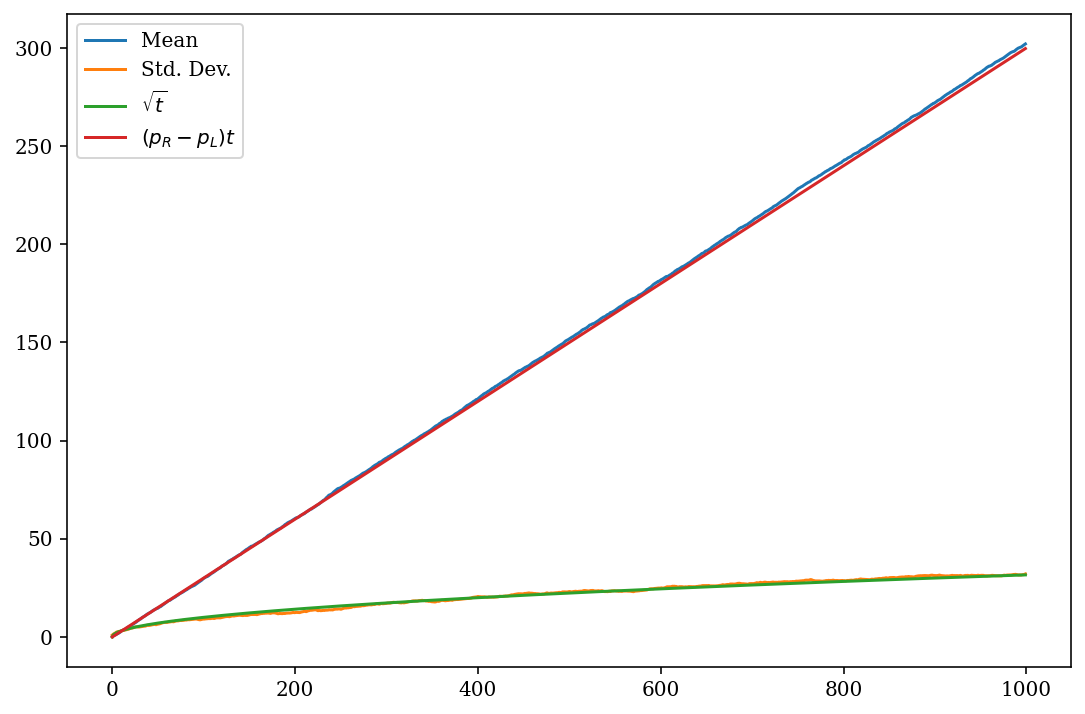

In [33]:
plt.plot(biased_mean, label='Mean')
plt.plot(biased_std, label='Std. Dev.')
plt.plot(np.sqrt(t), label= '$\sqrt{t}$')
plt.plot((0.65-0.35)*t, label='$(p_R - p_L)t$')
plt.legend()
plt.show()

So the standard deviation is about the same, it growns like $\sqrt{t}$. The average position grows linearly in time proportional to the difference between the probability of going right and the probability of going left. It also follows from this formula that if $p_R = p_L = 0.5$ the average position is constant at 0.

#### Part c. 

Rather than just walking up and down the number line, lets see what happens when the walk happens in two dimensions. Simulate 100 walkers each taking 1000 steps in the XY plane. Generate a 2D step by taking 2 independent samples from a standard normal distribution (mean=0, standard deviation=1). Plot 10 walks *in the XY plane*.

In [34]:
walks2d = rng.standard_normal(size=(2,1000,100)).cumsum(1)

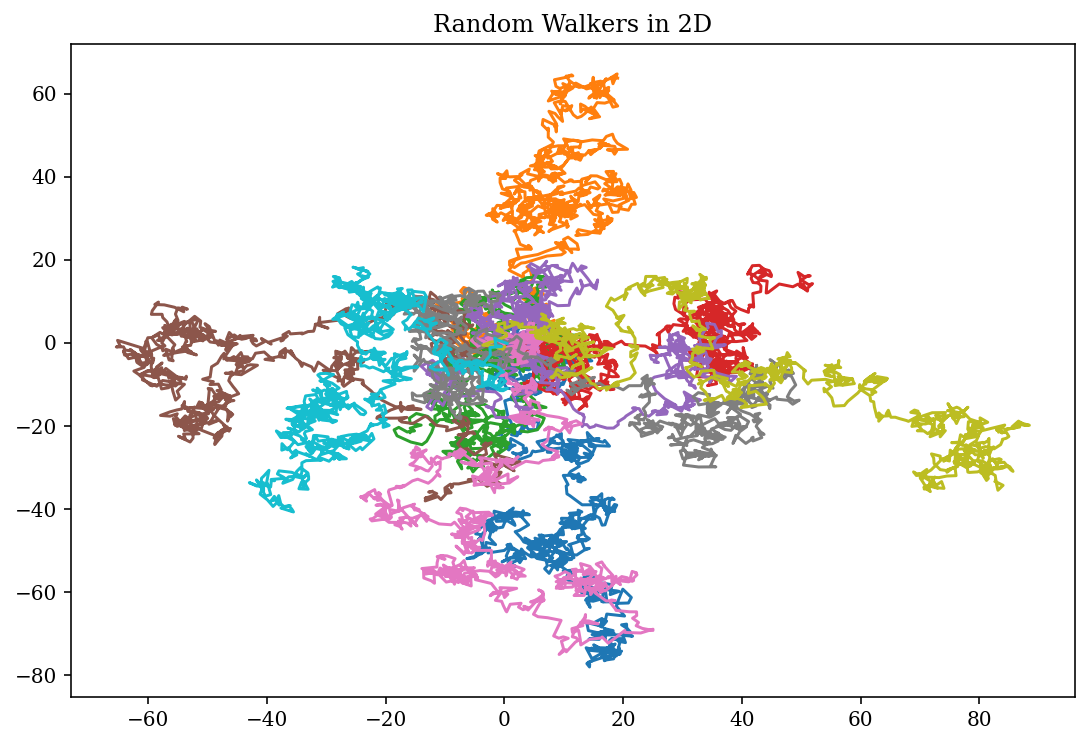

In [36]:
for i in range(10):
    plt.plot(walks2d[0,:,i], walks2d[1,:,i])
plt.title("Random Walkers in 2D")
plt.show()

#### Part d.

Find the walkers which end up the farthest from the origin and the closest. Plot these two trajectories in the XY plane.

*Hint* Given a point $(x,y)$ how do you compute the distance from the origin? Can you use numpy to compute the distance for all the walkers at all the time points without any loops?

**Optional** Try to make this cool plot from the bootcamp flyer. Plot all the walkers in black and use the keyword `alpha=0.5` in your call to `plt.plot`. Then plot the closest and farthest walkers in red and orange respectively.

<img src = "../day2/figures/2d_walk.png" width=400px>

In [37]:
R = np.sqrt(walks2d[0]**2 + walks2d[1]**2)

In [38]:
farthest = R[-1].argmax()
closest = R[-1].argmin()

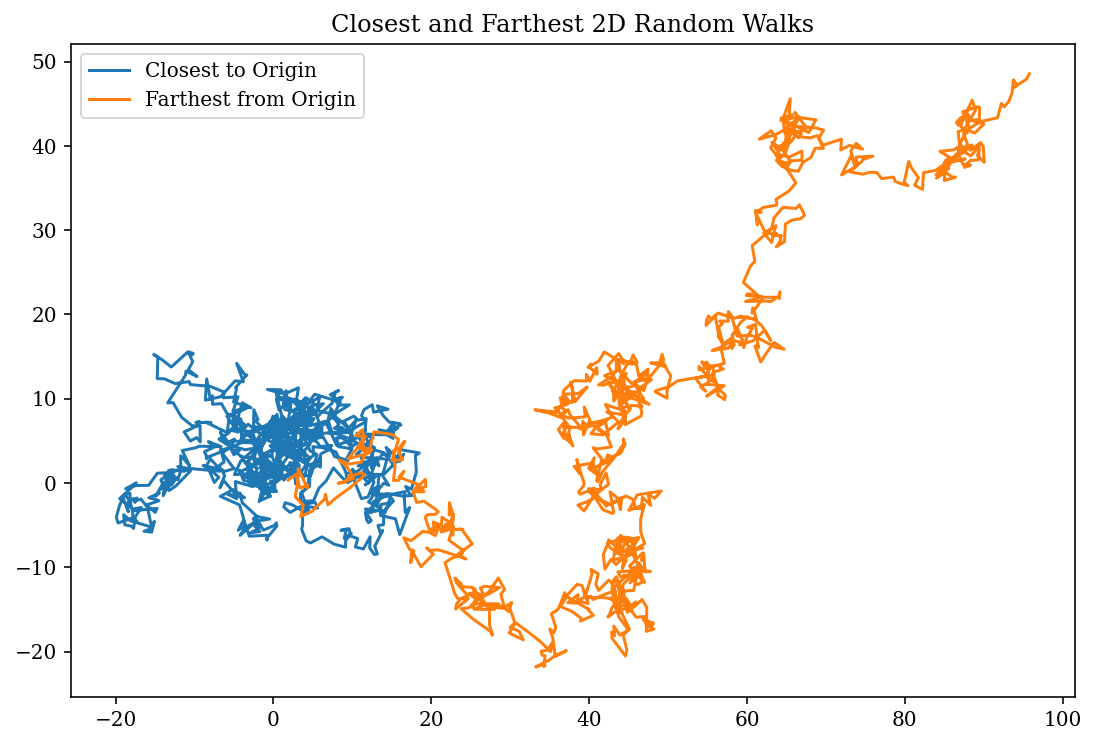

In [39]:
plt.plot(walks2d[0, :,closest], walks2d[1, :,closest], label="Closest to Origin")
plt.plot(walks2d[0, :,farthest], walks2d[1, :,farthest], label="Farthest from Origin")
plt.legend()
plt.title("Closest and Farthest 2D Random Walks")
plt.show()

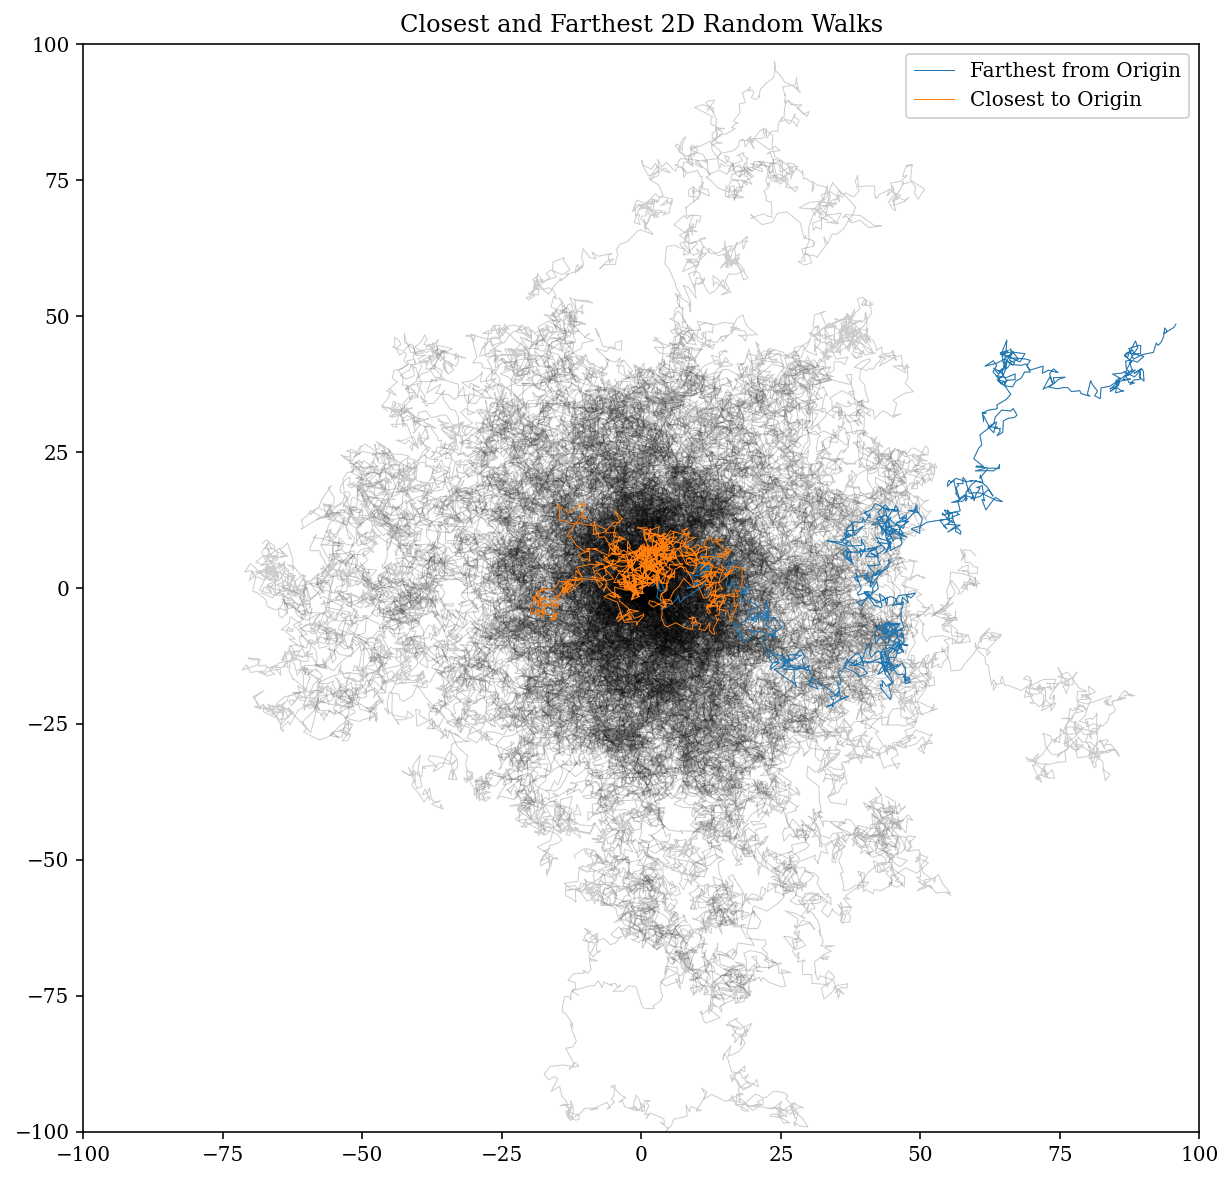

In [47]:
# Make the optional plot
plt.figure(figsize=(10,10))
# This line uses a short cut to plot all the columns of an array without looping. Not recommended in general but here it is quite handy.
plt.plot(walks2d[0], walks2d[1], c='black', alpha=0.2, linewidth=0.5)
plt.plot(walks2d[0, :,farthest], walks2d[1, :,farthest],
         label="Farthest from Origin", linewidth=0.5)
plt.plot(walks2d[0, :,closest], walks2d[1, :,closest], label="Closest to Origin", linewidth=0.5)
plt.legend()
plt.xlim(-100, 100)
plt.ylim(-100, 100)
plt.title("2D Random Walks")
plt.show()

#### Part e. 

Plot the trajectories of any walkers who remain in the first quadrant for their entire trajectory (i.e. $x(t)>0$ and $y(t)>0$ for all times $t$). You will probably want to simulate more walkers (~$10^5$) in order to find some who meet this criterion, it happens with probability ~0.05\%.

In [48]:
big_walks2d = rng.standard_normal(size=(2, 1000,10000)).cumsum(1)

In [49]:
positive_x = np.all(big_walks2d[0]>0, axis=0)
positive_y = np.all(big_walks2d[1]>0, axis=0)

In [50]:
first_quad = big_walks2d[:,:,positive_x&positive_y]

In [53]:
print((positive_x&positive_y).sum())

3


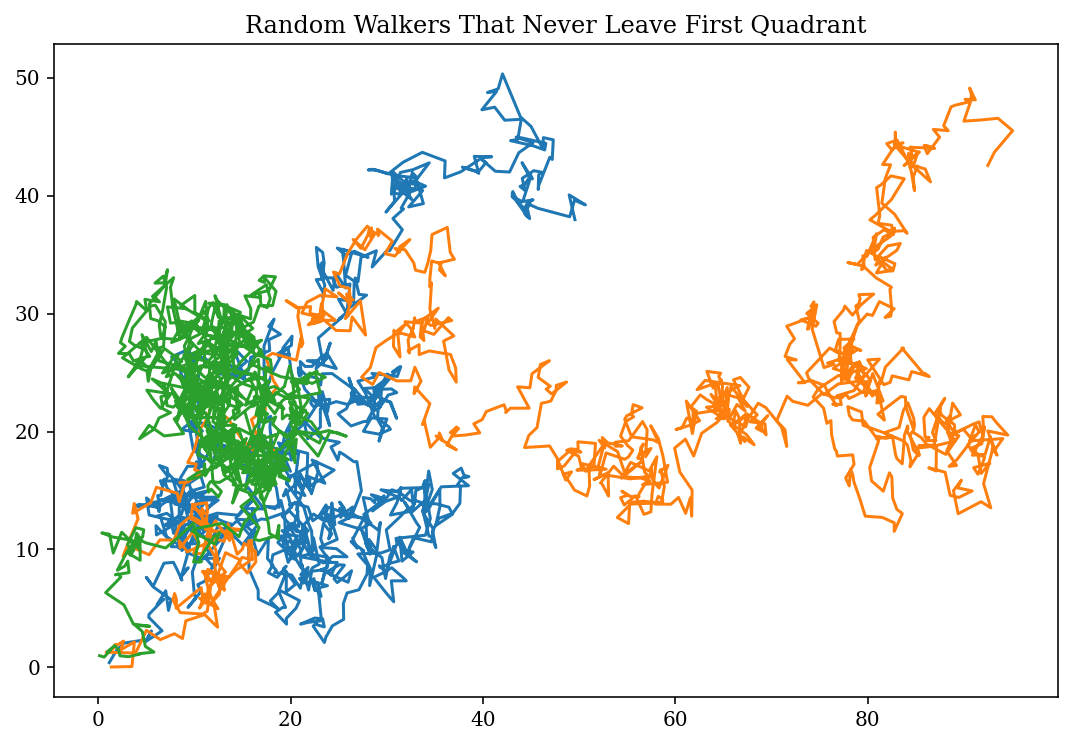

In [52]:
plt.plot(first_quad[0], first_quad[1])
plt.title("Random Walkers That Never Leave First Quadrant")
plt.show()

### Introduction to Scipy

As we have seen the past few days numpy is a highly performant array library and it contains some functions for simple math. How do we do more interesting/specialized things? People have written all sorts of libraries that use numpy arrays to do fancy things. The first layer of added complexity here is called Scipy. 

[Scipy Docs](https://docs.scipy.org/doc/scipy/reference/)

#### Solving differential equations

Generally the problem can be written as 

$$ \dfrac{dy}{dt} = f(t,y).$$

In some words, were given the derivative of a function and we want to find the function itself. One other key point is that we need to be given an *initial value* $y(0)$. Also note that $y$ can be a vector in which case $f(t,y)$ returns the derivative of each component.

One very cool differential equation is the [Lorenz system](https://en.wikipedia.org/wiki/Lorenz_system) which is represened by the following equations:


$$ \frac{dx}{dt} = \sigma(y-x)$$
$$ \frac{dy}{dt} = x(\rho-z) - y$$
$$ \frac{dz}{dt} = xy- \beta z.$$


"scipy solve differential equation"

In [56]:
from scipy.integrate import solve_ivp

In [54]:
#This is the example from the solve_ivp documentation
def lotkavolterra(t, z, a, b, c, d):
    x, y = z
    return [a*x - b*x*y, -c*y + d*x*y]

In [57]:
sol = solve_ivp(lotkavolterra, [0, 15], [10, 5], args=(1.5, 1, 3, 1),dense_output=True)

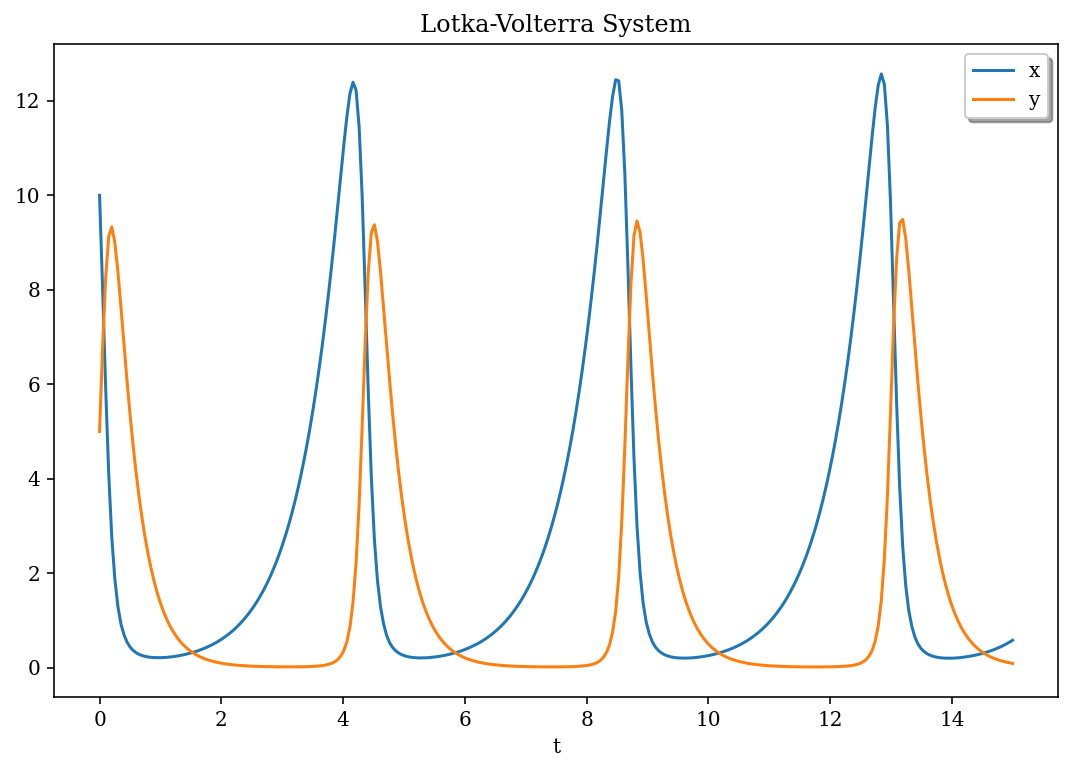

In [58]:
t = np.linspace(0, 15, 300)
z = sol.sol(t)
plt.plot(t, z.T)
plt.xlabel('t')
plt.legend(['x', 'y'], shadow=True)
plt.title('Lotka-Volterra System')
plt.show()

In [61]:
#implement the equations i wrote above
def lorenz(t, r, rho, sigma, beta):
    x,y,z = r
    dxdt = sigma*(y-x)
    dydt = x*(rho-z) - y
    dzdt = x*y-beta*z
    return np.array([dxdt, dydt, dzdt])

lorenz_init = np.array([1,1,1])

In [63]:
#use ρ = 28, σ = 10, and β = 8/3
lorenz_sol = solve_ivp(lorenz, (0,100), lorenz_init, args=(28,10,8./3), dense_output=True)

In [64]:
t_eval = np.linspace(0, 100, 10000)

In [65]:
r = lorenz_sol.sol(t_eval)

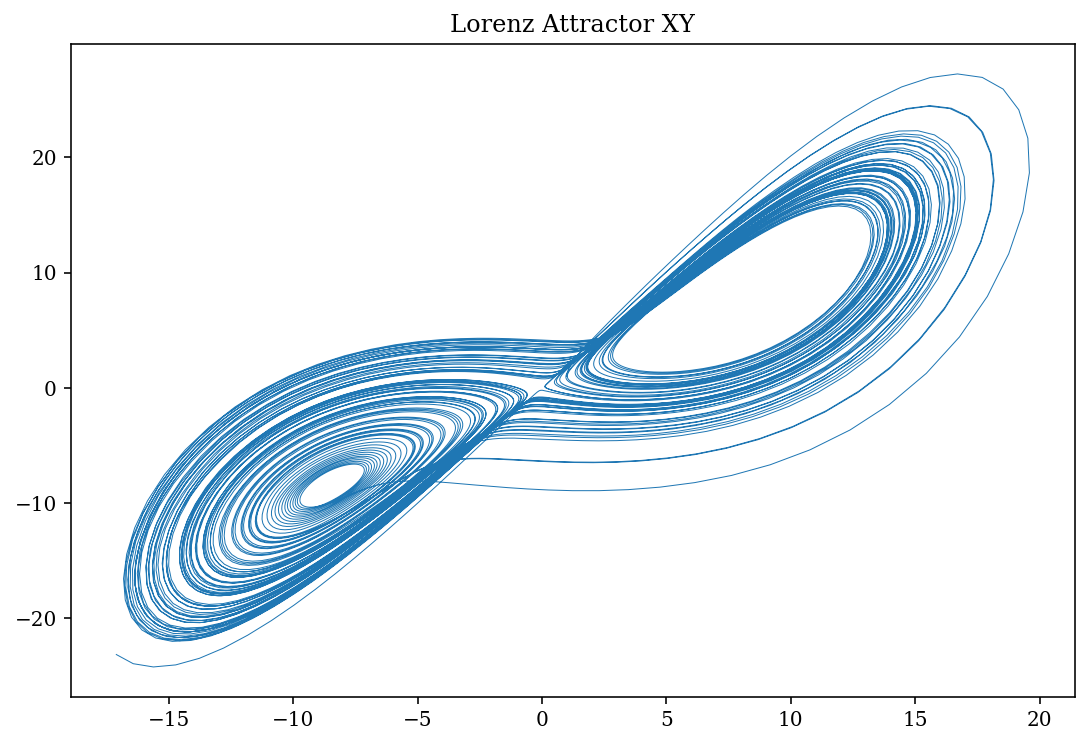

In [69]:
#plot x y
plt.plot(r[0], r[1], linewidth=0.5)
plt.title("Lorenz Attractor XY")
plt.show()

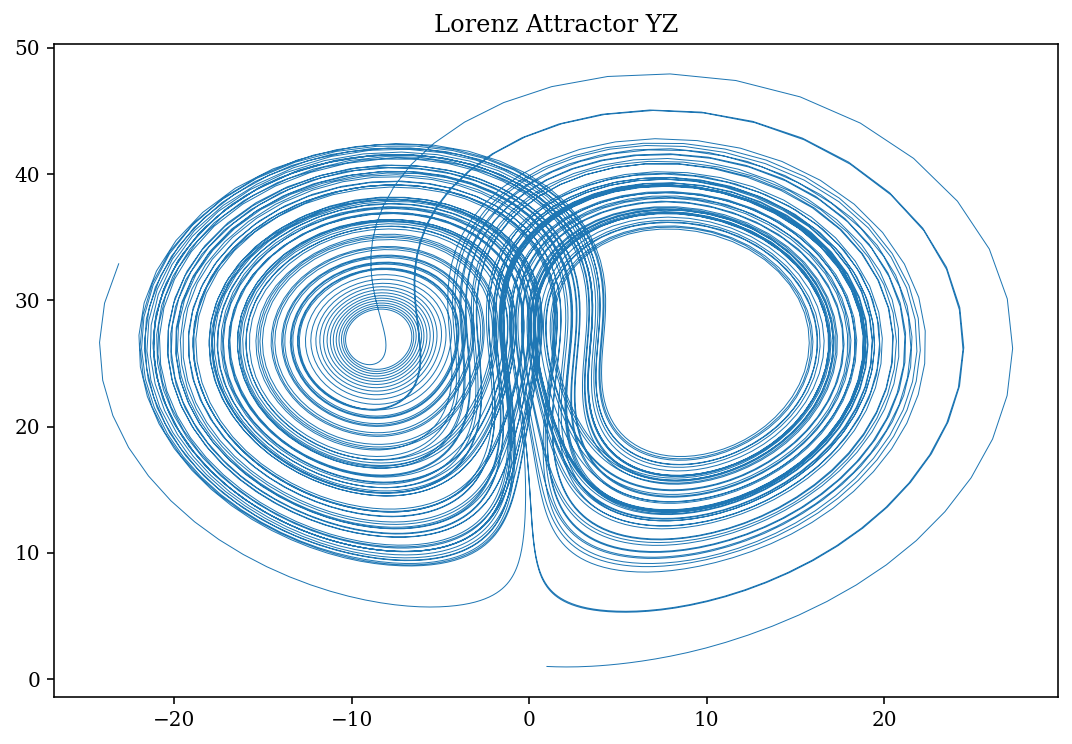

In [70]:
#plot y z
plt.plot(r[1], r[2], linewidth=0.5)
plt.title("Lorenz Attractor YZ")
plt.show()

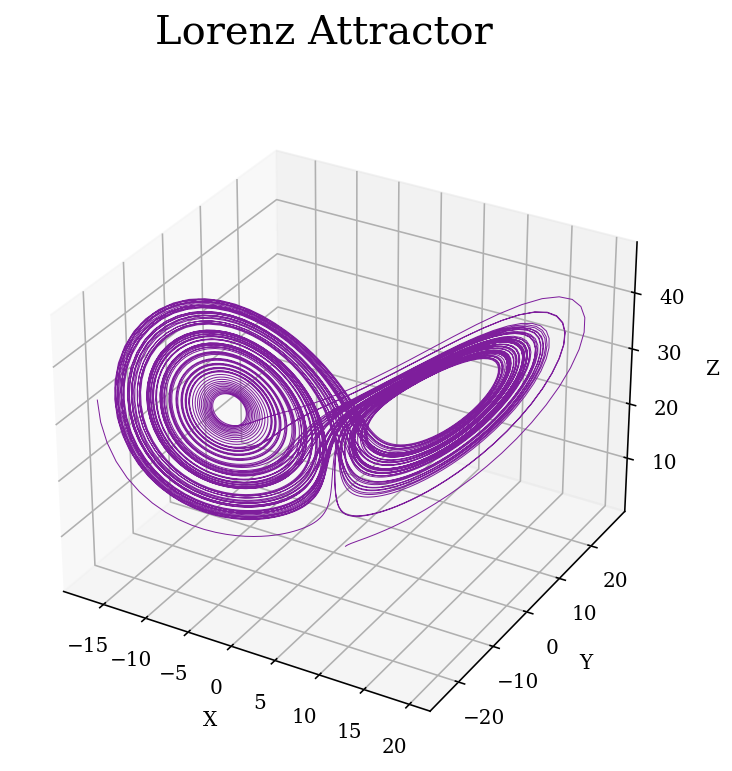

In [71]:
# This is beyond the scope of this bootcamp but just to show you that its possible
# I google "matplotlib 3d plot example" every single time I do this
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
fig.suptitle(r"Lorenz Attractor", fontsize=20)
ax.plot(r[0], r[1], r[2], linewidth=0.5,c='xkcd:purple')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()